# Lab 5 : Data visualization - Non-linear methods

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE

## Part A : The digits dataset - PCA vs t-SNE vs MDS vs LLE vs ISOMAP

The file "digits.csv" https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits contains a well knwon dataset of the MNIST family. It describes digits writen by 43 people in 32x32 bitmaps. 32x32 bitmaps are divided into non-overlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range [0..16]. It is this matrix which is inside the file, plus a 65th column for the class (the number between 0 and 9). 

#### Question 1 : Load the *digits.csv* file with the right parameters. Check the data format and store the class column in a separate variable. Remark: Like for the iris dataset, this dataset can also be loaded directly from sklearn.

In [2]:
digits = pd.read_csv("Data/digits.csv",header=None,index_col=False)
print(digits.head())
print(digits.shape)

   0   1   2   3   4   5   6   7   8   9   ...  55  56  57  58  59  60  61  \
0   0   0   5  13   9   1   0   0   0   0  ...   0   0   0   6  13  10   0   
1   0   0   0  12  13   5   0   0   0   0  ...   0   0   0   0  11  16  10   
2   0   0   0   4  15  12   0   0   0   0  ...   0   0   0   0   3  11  16   
3   0   0   7  15  13   1   0   0   0   8  ...   0   0   0   7  13  13   9   
4   0   0   0   1  11   0   0   0   0   0  ...   0   0   0   0   2  16   4   

   62  63  64  
0   0   0   0  
1   0   0   1  
2   9   0   2  
3   0   0   3  
4   0   0   4  

[5 rows x 65 columns]
(1797, 65)


#### Question 2 : Using a code similar as the one from the previous lab, run a PCA on the data and visualize the results. Are the classes (the 10 digits) well separated ?

In [3]:
nb_samples, nb_features = digits.shape
nb_features -= 1
digit_class=digits.iloc[:, 64]
dig_list=np.unique(digit_class.values)
digits=digits.iloc[:, 0:63]
pca = PCA(n_components=2)
digits_pca = pca.fit_transform(digits)

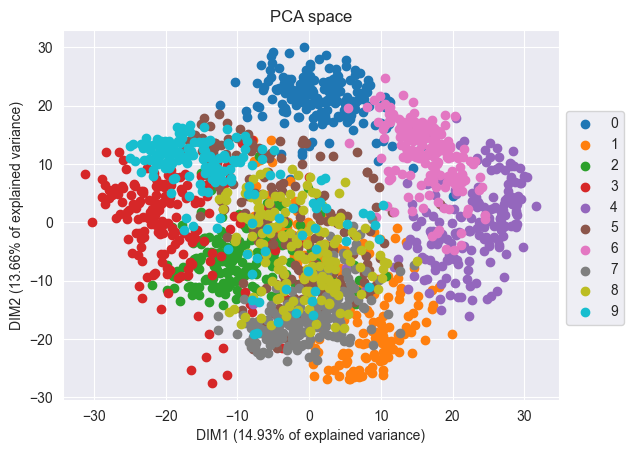

In [4]:
pc1 = round(pca.explained_variance_ratio_[0] * 100,2)
pc2 = round(pca.explained_variance_ratio_[1] * 100,2)

fig, ax = plt.subplots();
for dig in dig_list:
    ax.scatter(digits_pca[digit_class==dig, 0], digits_pca[digit_class==dig, 1],label=dig);
ax.set_xlabel("DIM1 ({0}% of explained variance)".format(pc1, fontsize=11))
ax.set_ylabel("DIM2 ({0}% of explained variance)".format(pc2, fontsize=11))
ax.legend(bbox_to_anchor=(1, 0.8));    
ax.set_title('PCA space', fontsize=12);

<u>Answer 2 : </u> 

We can distinguished different blobs for the different digits. But they are not well separated.

#### Question 3 : Apply the LLE algorithm (LocallyLinearEmbedding in sklearn) to the same dataset and try the following neighborhood values : 7, 10, 13, 15, 18 and 20. For reproductibility, you will lock the initial random_state parameter to 0. Comment on the results.

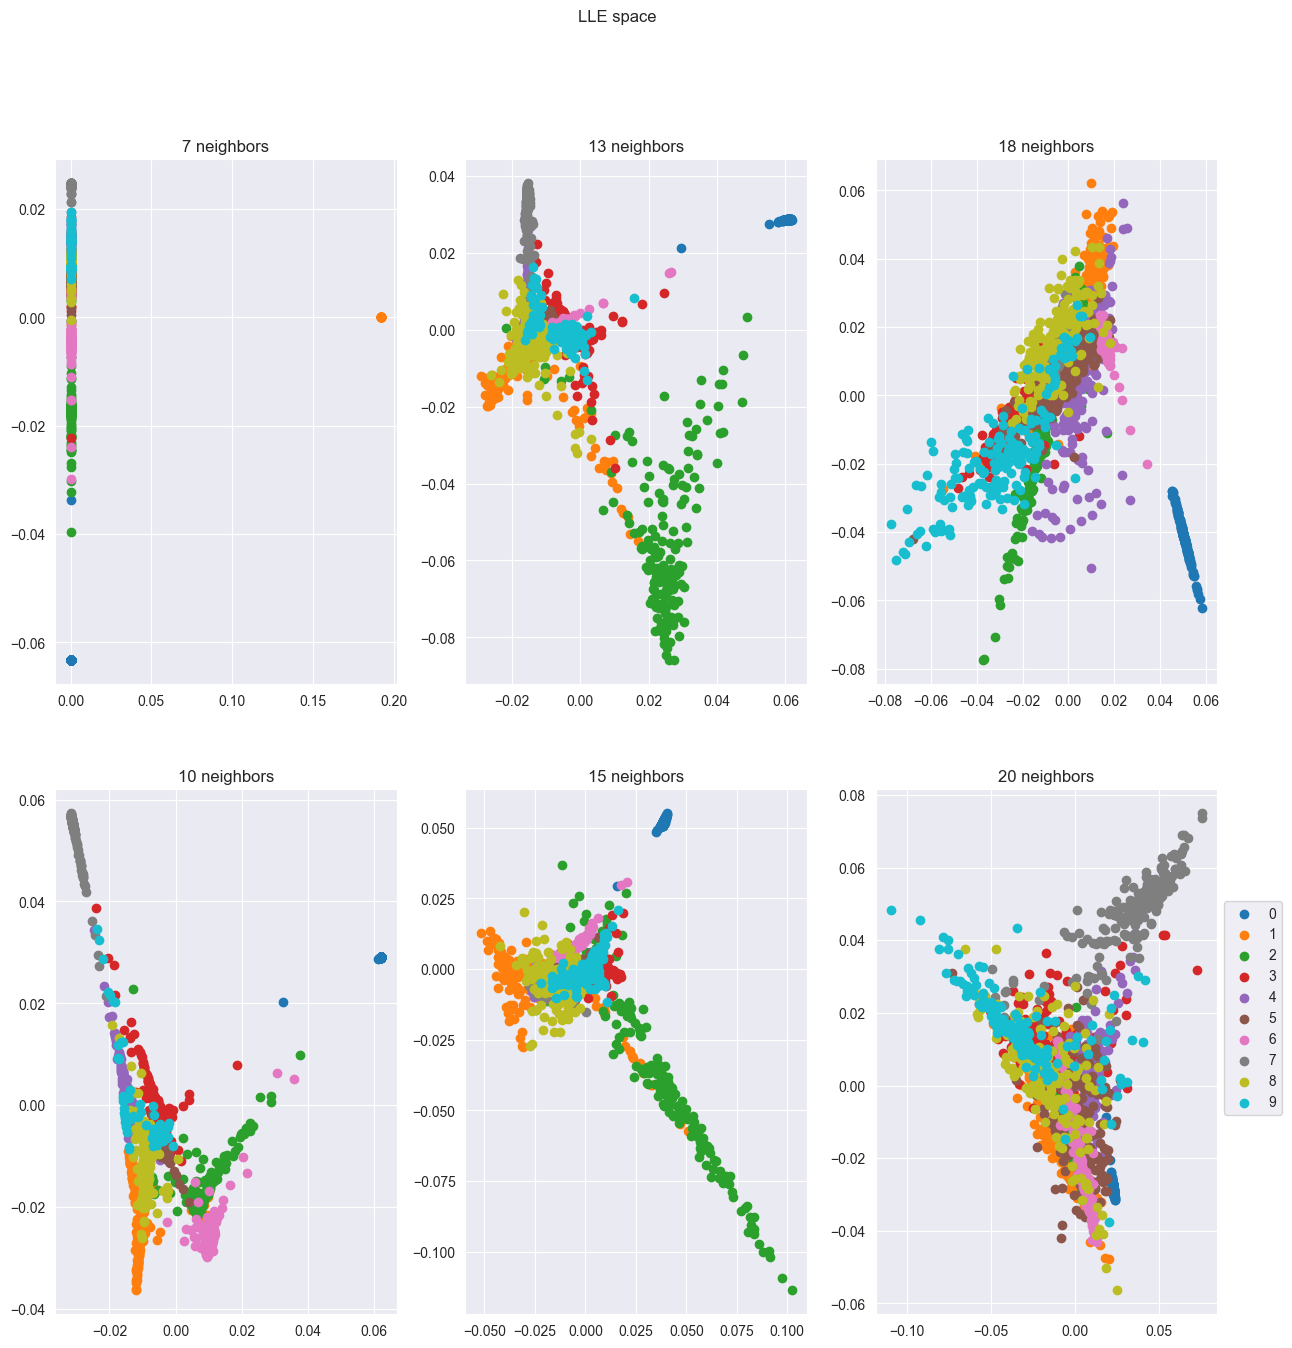

In [5]:
nb_lines = 2
nb_cols = 3

fig, ax = plt.subplots(nb_lines, nb_cols, figsize=(15, 15))
line_ids, col_ids = np.meshgrid(range(0, nb_lines), 
                                range(0, nb_cols))
fig.suptitle('LLE space', fontsize=12)
for n_neighbor, line_id, col_id in zip([7, 10, 13, 15, 18, 20],
                                      line_ids.flatten(), col_ids.flatten()):
   model = LocallyLinearEmbedding(n_neighbors=n_neighbor, random_state=0)
   digits_lle = model.fit_transform(digits)
   for dig in dig_list:
         ax[line_id, col_id].scatter(digits_lle[digit_class==dig, 0], digits_lle[digit_class==dig, 1],label=dig);    
   
   ax[line_id, col_id].set_title("{0} neighbors".format(n_neighbor))
plt.legend(bbox_to_anchor=(1, 0.8));   

<u>Answer 3 : </u>

The visualizations have varying quality depending on the number of neighbors. It is overall not great. We can however see, that depending on the number of neighbors, it is not the same digit groups that can best be separated from the other

#### Question 4 : Same question for the ISOMAP algorithm with the following neighborhood values : 10, 25, 50, 75, 100 and 200. Comment on the results.

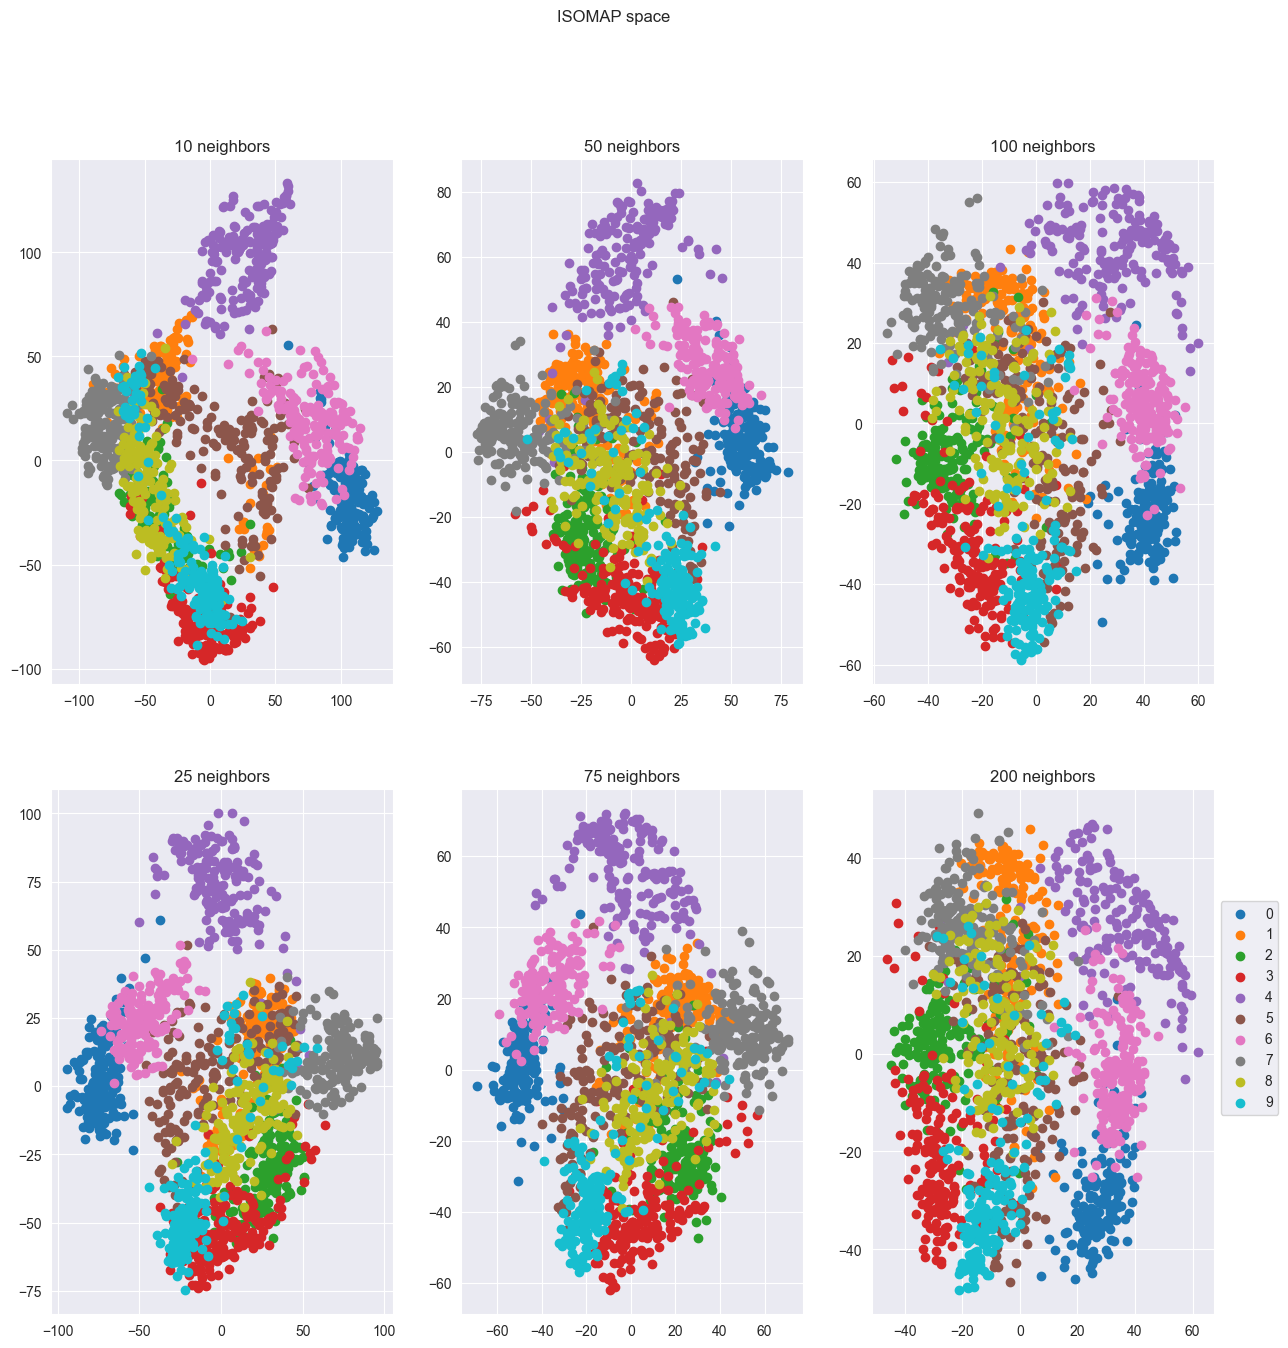

In [6]:
nb_lines = 2
nb_cols = 3

fig, ax = plt.subplots(nb_lines, nb_cols, figsize=(15, 15))
line_ids, col_ids = np.meshgrid(range(0, nb_lines), 
                                range(0, nb_cols))
fig.suptitle('ISOMAP space', fontsize=12)
for n_neighbor, line_id, col_id in zip([10, 25, 50, 75, 100, 200],
                                      line_ids.flatten(), col_ids.flatten()):
   model = Isomap(n_neighbors=n_neighbor)
   digits_lle = model.fit_transform(digits)
   for dig in dig_list:
         ax[line_id, col_id].scatter(digits_lle[digit_class==dig, 0], digits_lle[digit_class==dig, 1],label=dig);    
   
   ax[line_id, col_id].set_title("{0} neighbors".format(n_neighbor))
plt.legend(bbox_to_anchor=(1, 0.8));   

<u>Answer 4 :</u>

We have once more results with different quality. 25 to 75 neighbors seem to give the best results here.

#### Question 5 : Apply the MDS algorithm from sklearn. For reproductibility purposes, don't forget to set the random_state parameter to 0. Comment on the results.

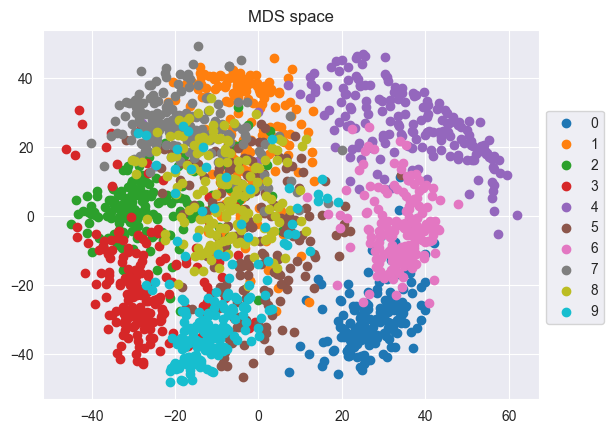

In [7]:
mds = MDS(random_state=0)
digits_mds = model.fit_transform(digits)

fig, ax = plt.subplots();
for dig in dig_list:
     ax.scatter(digits_lle[digit_class==dig, 0], digits_lle[digit_class==dig, 1],label=dig); 
ax.legend(bbox_to_anchor=(1, 0.8));    
ax.set_title('MDS space', fontsize=12);            

<u>Answer 5 :</u>

It is not great.

#### Question 6 : Using the TSNE package from sklearn, apply the TSNE function on your data. This function has two important parameters : The data and the perplexity. Remind the definition and role of the perplexity for the t-SNE algorithm, and then try the values 10, 50, 75 and 100 on your dataset. Once again, set the random state to 0. Visualize the results and comment. Remark: t-SNE can be rather slow to run. This is normal.

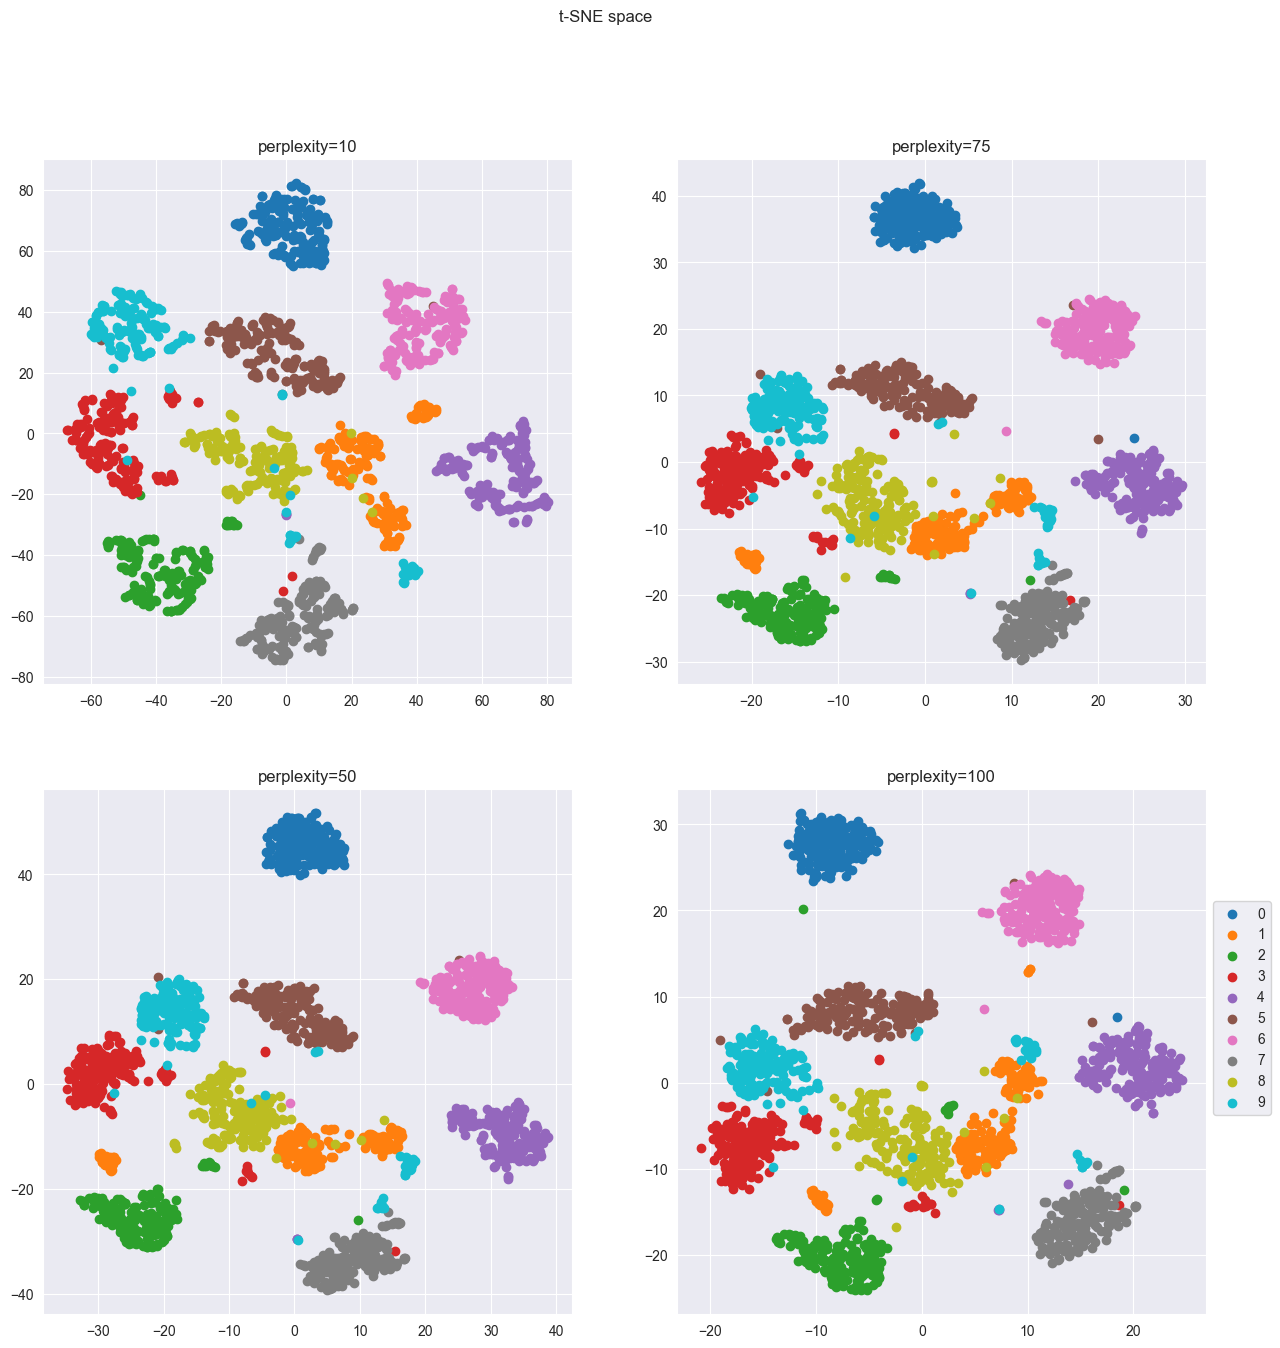

In [8]:
nb_lines = 2
nb_cols = 2

fig, ax = plt.subplots(nb_lines, nb_cols, figsize=(15, 15))
line_ids, col_ids = np.meshgrid(range(0, nb_lines), 
                                range(0, nb_cols))
fig.suptitle('t-SNE space', fontsize=12)
for perp, line_id, col_id in zip([10,50,75,100],
                                      line_ids.flatten(), col_ids.flatten()):
   model = TSNE(n_components=2,perplexity=perp, random_state=0)
   digits_tsne = model.fit_transform(digits)
   for dig in dig_list:
         ax[line_id, col_id].scatter(digits_tsne[digit_class==dig, 0], digits_tsne[digit_class==dig, 1],label=dig);    
   
   ax[line_id, col_id].set_title("perplexity={0}".format(perp))
plt.legend(bbox_to_anchor=(1, 0.8));  

<u> Answer 6 :</u>

The t-sne visualization are overall good. The perplexity around 50 might be the best one.

#### Question 7 : Based on the previous results and on your knowledge from the course. Details the advantages and inconvenients of the different visualization methods that you just used. You will discuss them in general and in the specific case of the digits dataset.

<u>Answer 7 :</u>

t-sne is without question the best one here, but it is also one of the slowest. MDS and PCA are very average, but they have no parameters to set up unlike all other methods, which makes them convenient. LLE and isomap have the neighborhood parameter (equivalent to the perplexity in t-sne) which is not easy to set up. Furthoremore, both are relatively slow and give only mild results.
PCA is the fastest.

## Part B : Visualizing genomic data with MDS.

In this part, we will study a very small and very curated extract from the Allen Ancient DNA database (https://reich.hms.harvard.edu/allen-ancient-dna-resource-aadr-downloadable-genotypes-present-day-and-ancient-dna-data). The dataset proposed in this exercise contains the DNA information for the Y chromosome of 432 individuals from all around the world. In this dataset, the Y chromosome is described by 597 variables which are "single nucleotide polymorphism" (SNPs). 

In genomics, single nucleotides can take 4 values : "G", "A", "T" or "C". Furthermore, since nearly all chromosomes work as pairs, you will have a combination of 2 of these letters. Since most stastistical methods and AI methods rely on numbers, this system with pairs of letters is not very convenient for data analysis. For this reason, most genomic dataset will count the number of nucleotides matching with a reference genome rather than using the actual letter. For instance, if the reference letter for a given SNP is G, and the observed individual has the pair "GG", then the value for this SNP will be 2, if it has "GA" the value will be 1, if it has "TT" the value will be 0, etc.

In the case of the Y chromosome, it doesn't work as a pair. Therefore, the SNPs for chromosome Y in your dataset can take only the following values : 
- 1 if the present letter matches with the reference genome
- 0 if it does not match with the reference genome
- 3 if the information is missing

In addition to the values for the different SNPs, the dataset for this exercise has a companion file that contains various information that you may use for visualization purposes. These information include :
- The locality and country where the DNA was taken
- The Y haplogroup of the different individuals : Y haplogroups are built based on common mutations on the Y chromosom.

#### Question 1 : Open the "Yhaplfiltered40pct.csv" dataset and its companion file "Yhaplfiltered40pct_classes.csv" with the right parameters.

In [9]:
yhapl = pd.read_csv("Data/Yhaplfiltered40pct.csv",sep=";",index_col=0)
print(yhapl.head())
print(yhapl.shape)

                       rs11575897  rs2253109  rs2058276  rs113328317  \
Genetic ID                                                             
Ne30_genotyping_noUDG           3          3          0            1   
Aconcagua_noUDG.SG              1          3          3            1   
I1407                           3          3          3            1   
XAR001                          3          3          0            1   
I16444                          3          0          3            1   

                       rs34402762  rs112001559  rs35284970  rs9786209  \
Genetic ID                                                              
Ne30_genotyping_noUDG           1            3           3          1   
Aconcagua_noUDG.SG              1            1           1          1   
I1407                           3            1           3          1   
XAR001                          3            1           3          0   
I16444                          3            1           

In [10]:
yhapl_c = pd.read_csv("Data/Yhaplfiltered40pct_classes.csv",sep=";",index_col=0)
print(yhapl_c.head())
print(yhapl_c.shape)

                      Political Entity  \
Genetic ID                               
Ne30_genotyping_noUDG            China   
Aconcagua_noUDG.SG           Argentina   
I1407                          Armenia   
XAR001                        Botswana   
I16444                 Channel Islands   

                                                        Locality  \
Genetic ID                                                         
Ne30_genotyping_noUDG                           Nepal, Kathmandu   
Aconcagua_noUDG.SG             Cerro Aconcagua, Mendoza Province   
I1407                                                    Areni 1   
XAR001                                                      Xaro   
I16444                 Channel Islands, Guernsey, Vale, Le Déhus   

                      Molecular Sex  Master ID   World Zone Y haplogroup  \
Genetic ID                                                                 
Ne30_genotyping_noUDG             M       NE30     Asia (E)            C   


#### Question 2 : Display a heatmap of this dataset. Comment.

<Axes: ylabel='Genetic ID'>

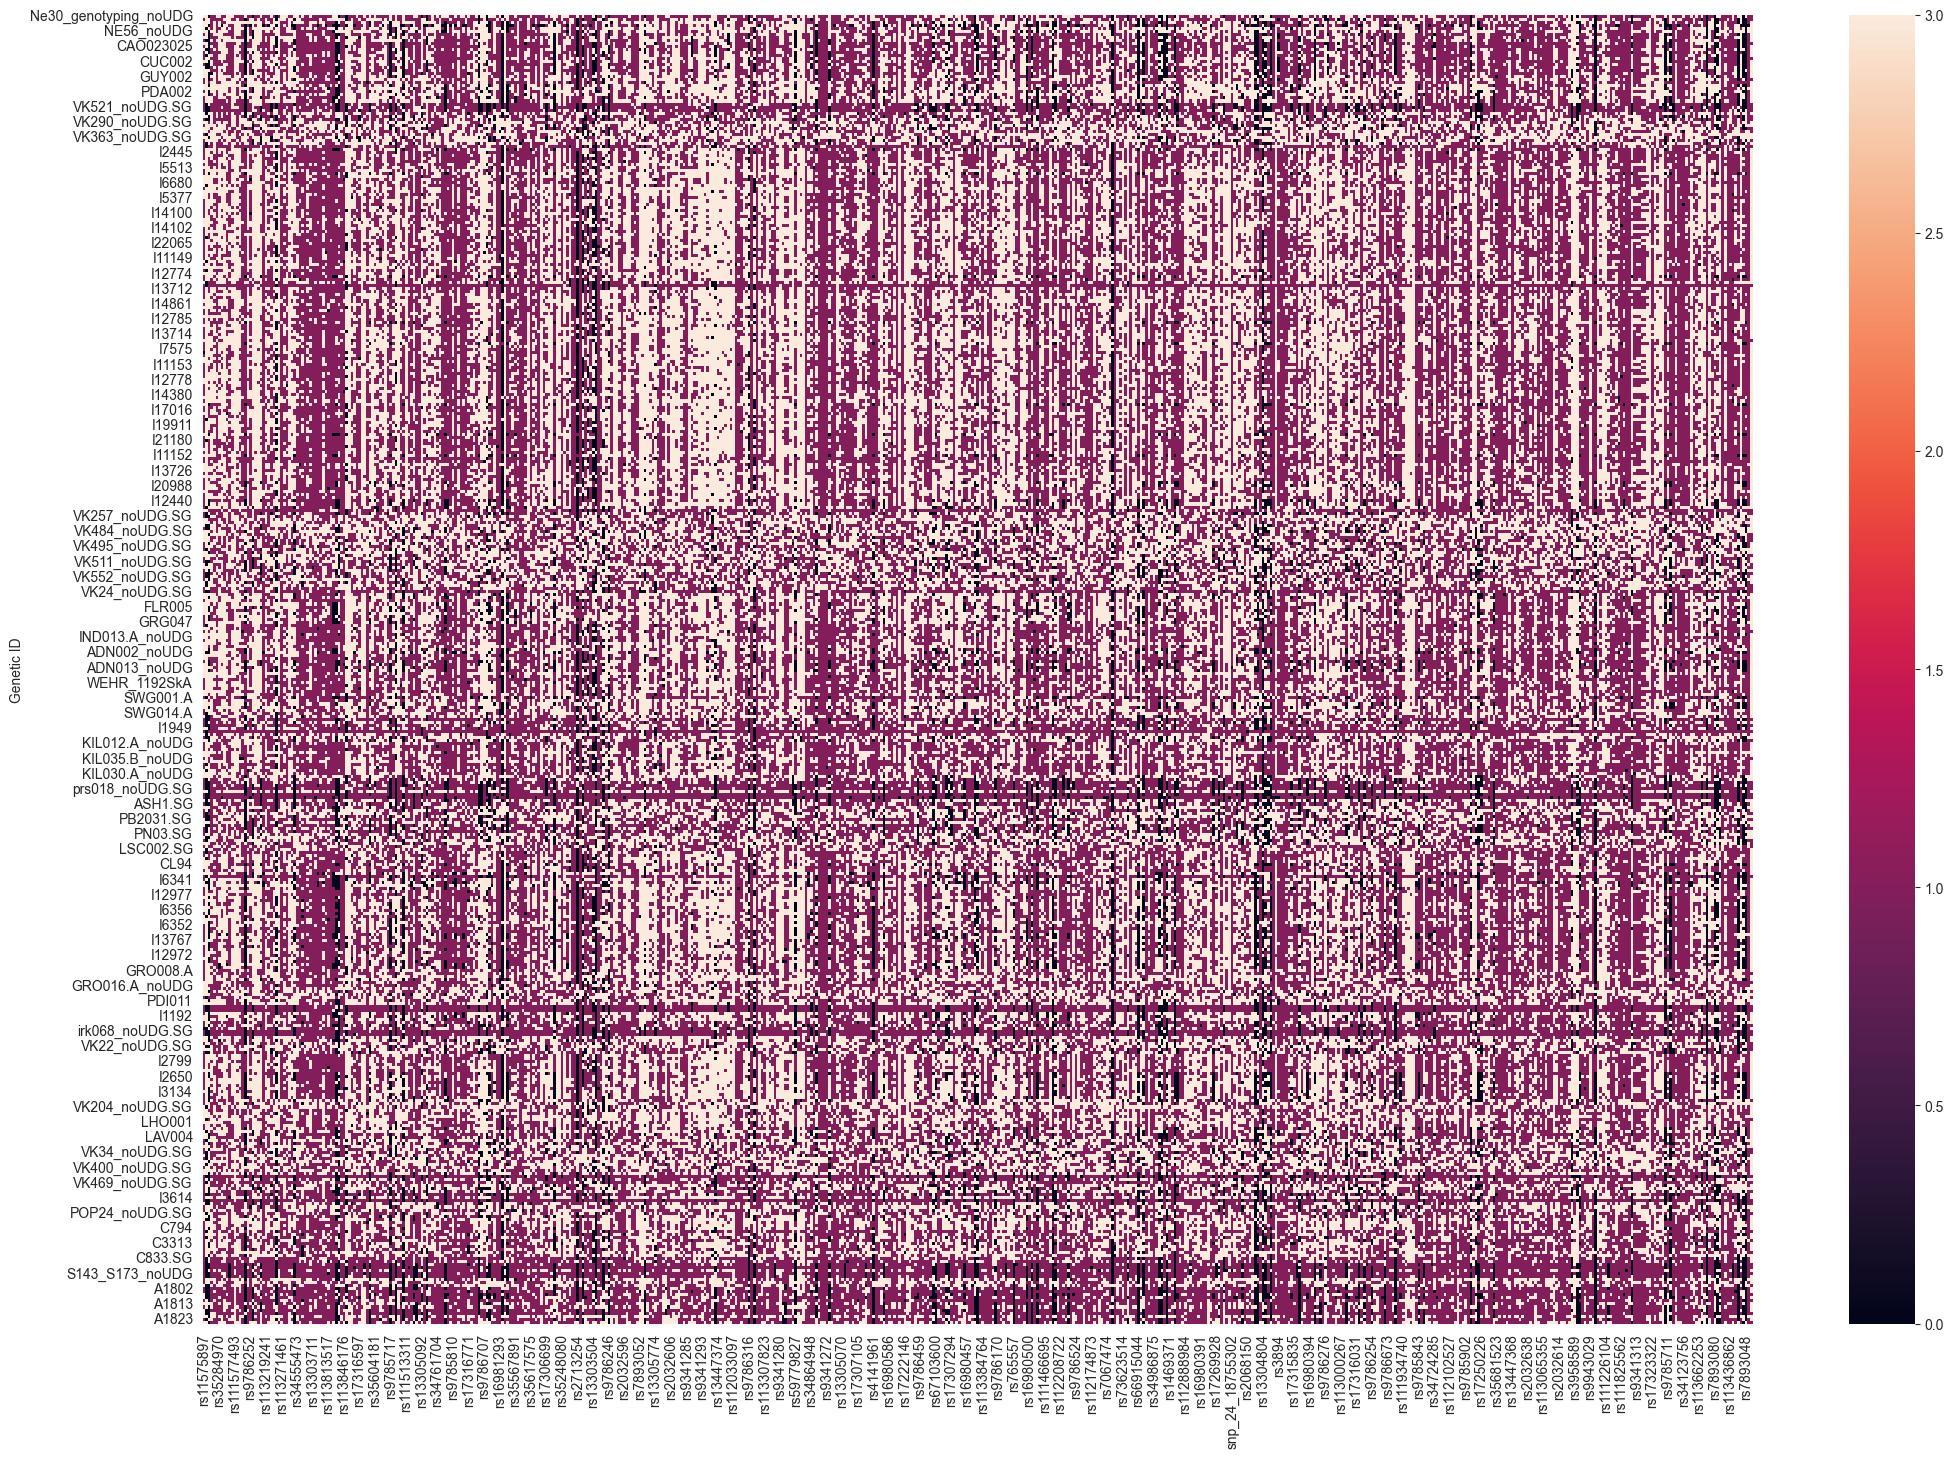

In [11]:
fig, ax = plt.subplots(figsize=(25,17))
sns.heatmap(yhapl,annot=False)

<u>Answer 2 : </u>

From the white in the heatmap, we can see that we have quite a lot of missing data, and that some individuals and SNPs are more affected than others. From the red and black, we can see that mutations (0 versions from the reference genome) are in the minority.

#### Question 3 : Based on your previous answer and your knowledge from the course, explain why the MDS algorithm is a reasonable option to try to visualize this dataset in lower dimension. In particular, despite many geniticists doing it, you will give at least 2 arguments to explain why PCA is a very poor choice for this type of data.

<u>Answer 3 : </u>

In this dataset, each variable is a counting of the number of copy for a variant of a gene compared with a reference genome : 0 or 1 for the Y chromosome (or 3 if the information is missing).
PCA is a correlation based method that works only with linear data : In the case of genetic data, there is no reason for correlations to show up between present or absent genes. Furthermore these data are pseudo binary, and most likely not linear. PCA is therefore a bad choice. We could also mention the large number of missing data, that PCA cannot handle.

On the other hand, we have seen that MDS is a parameter-free algorithm, which is relatively fast compared will LLE, t-SNE and ISOMAP. Both are fair advantages given the size of the dataset, and the nature of the data (no Euclidian distances for this type of pseudo binary data). We could also mention once again the issue of the missing data which could me a problem to compute the local neighborhood with LLE, t-SNE and ISOMAP, but might not be as big as an issue to provide a hamming-based distance matrix as an input to MDS.

#### Question 4 : Without removing the missing data (otherwise, the whole dataset will disappear), propose a MDS based visualization method for this dataset. Your method will have to include a quality measure for the projection of each individual points. 

The key steps you may want to follow are : 
- Computing the distance/dissimilarity matrix for the dataset (you may want to try several policies to handle the missing data) 
- Computing the MDS projection based on the distance matrix. You may try d=2 and d=3.
- Proposing a quality criterion based on the original and MDS distance/dissimilarity matrices
- Commenting on the projection based on the quality criterion, the location where the DNA was sampled and the Y haplogroups (you may want to shorten them)

In [12]:
from numba import jit

In [13]:
@jit(nopython=True)
def HammingDistance(matrix):
    nind=matrix.shape[0]
    nsnp=matrix.shape[1] 
    distmat=np.zeros((nind,nind),dtype=float)
    
    for i in range(0,nind):
        for j in range(i+1,nind):
            for k in range(0,nsnp):
                if(matrix[i][k]<3 and matrix[j][k]<3):  ## we choose to ignore the missing values
                    distmat[i][j] += abs(matrix[i][k]-matrix[j][k])
            distmat[j][i]=distmat[i][j]
    
    return distmat

@jit(nopython=True)
def EuclidianDistance(matrix):
    nind=matrix.shape[0]
    nsnp=matrix.shape[1] 
    distmat=np.zeros((nind,nind),dtype=float)
    
    for i in range(0,nind):
        for j in range(i+1,nind):
            for k in range(0,nsnp):
                distmat[i][j] += (matrix[i][k]-matrix[j][k])**2
            distmat[i][j]=np.sqrt(distmat[i][j])
            distmat[j][i]=distmat[i][j]
    
    return distmat


@jit(nopython=True)     
def IndivRMSD(distmat1,distmat2):
    nind=distmat1.shape[0]
    inderr=np.zeros(nind)
    for i in range(0,nind):
        for j in range(0,nind):
            inderr[i] +=(distmat1[i][j]-distmat2[i][j])**2
        inderr[i]=np.sqrt(inderr[i]/(nind-1))        
    return inderr

@jit(nopython=True)             
def MSE(distmat1,distmat2):
    resmat=np.absolute(distmat1-distmat2)**2
    return np.sum(resmat)/(distmat1.shape[0]*(distmat1.shape[0]-1))

def RMSE(distmat1,distmat2):
    res=MSE(distmat1,distmat2)
    return np.sqrt(res)

In [14]:
np_yhapl=yhapl.to_numpy()
y_dist=HammingDistance(np_yhapl)
y_dist

array([[ 0.,  1.,  1., ...,  0.,  1.,  0.],
       [ 1.,  0., 10., ...,  7., 15., 10.],
       [ 1., 10.,  0., ...,  1.,  5.,  2.],
       ...,
       [ 0.,  7.,  1., ...,  0.,  0.,  0.],
       [ 1., 15.,  5., ...,  0.,  0.,  0.],
       [ 0., 10.,  2., ...,  0.,  0.,  0.]])

In [15]:
model = MDS(n_components=3,dissimilarity="precomputed")
df_mds = model.fit_transform(y_dist)

In [16]:
distmat_mds=EuclidianDistance(df_mds)
distmat_mds

array([[ 0.        ,  5.4533703 ,  9.16189707, ...,  5.38600107,
        17.371665  , 10.01155517],
       [ 5.4533703 ,  0.        , 11.52085737, ...,  7.86681373,
        17.25869195, 11.49110789],
       [ 9.16189707, 11.52085737,  0.        , ...,  3.90900641,
         9.43548841,  2.02523628],
       ...,
       [ 5.38600107,  7.86681373,  3.90900641, ...,  0.        ,
        12.20544498,  4.64380905],
       [17.371665  , 17.25869195,  9.43548841, ..., 12.20544498,
         0.        ,  7.91851194],
       [10.01155517, 11.49110789,  2.02523628, ...,  4.64380905,
         7.91851194,  0.        ]])

In [17]:
indverr=IndivRMSD(y_dist,distmat_mds)
rmse=RMSE(y_dist,distmat_mds)

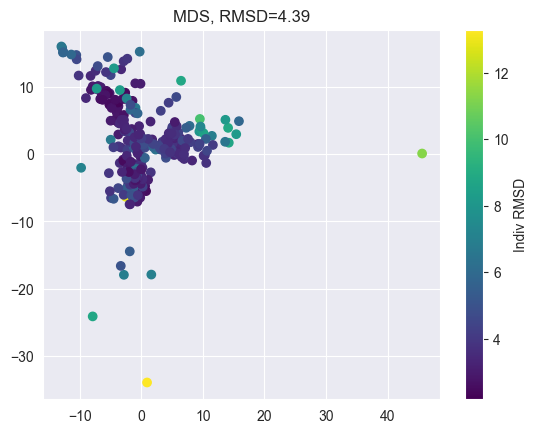

In [18]:
fig, ax = plt.subplots()
ax.scatter(df_mds[:, 0],df_mds[:, 1],c=indverr,cmap='viridis')
ax.set_title("MDS, RMSD={0}".format(np.round(rmse,2)), fontsize=12);

m = cm.ScalarMappable(cmap='viridis')
m.set_array([indverr])
fig.colorbar(m,label="Indiv RMSD",ax=plt.gca())
plt.show()

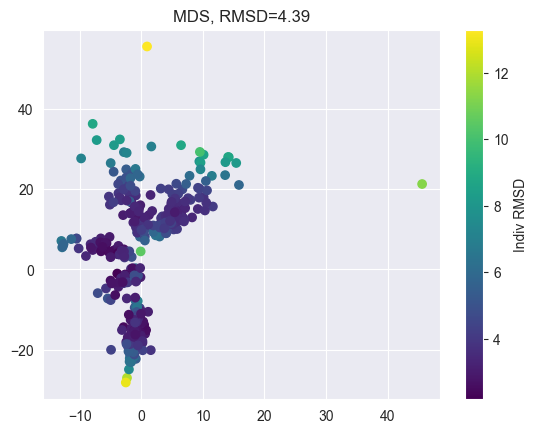

In [19]:
fig, ax = plt.subplots()
ax.scatter(df_mds[:, 0],df_mds[:, 2],c=indverr,cmap='viridis')
ax.set_title("MDS, RMSD={0}".format(np.round(rmse,2)), fontsize=12);

m = cm.ScalarMappable(cmap='viridis')
m.set_array([indverr])
fig.colorbar(m,label="Indiv RMSD",ax=plt.gca())
plt.show()

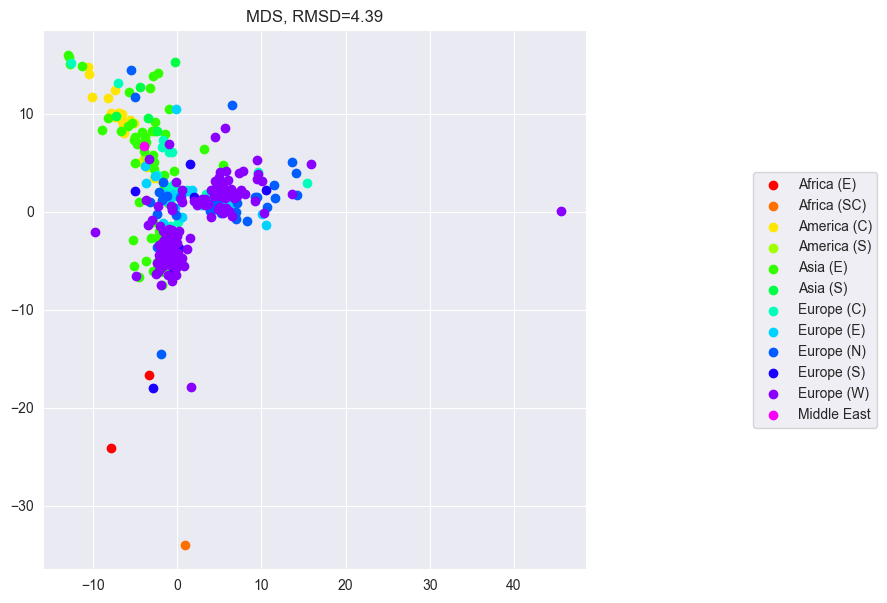

In [20]:
cmap = plt.get_cmap('hsv')
groups=np.unique(yhapl_c["World Zone"].astype(str))
colors = cmap(np.linspace(0, 1, len(groups)+2))

plt.figure(figsize=(7, 7))
for i, (group, color) in enumerate(zip(groups, colors), 1):
    plt.scatter(df_mds[yhapl_c["World Zone"]==group][:,0], df_mds[yhapl_c["World Zone"]==group][:,1], color=color)
plt.legend(groups,loc='center right',bbox_to_anchor=(1.55, 0.5))    
plt.title("MDS, RMSD={0}".format(np.round(rmse,2)), fontsize=12);

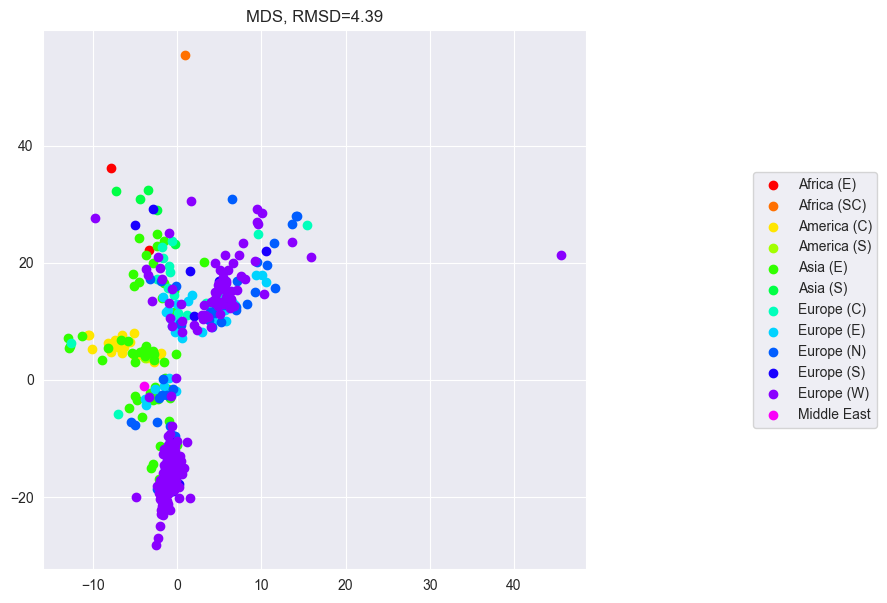

In [21]:
cmap = plt.get_cmap('hsv')
groups=np.unique(yhapl_c["World Zone"].astype(str))
colors = cmap(np.linspace(0, 1, len(groups)+2))

plt.figure(figsize=(7, 7))
for i, (group, color) in enumerate(zip(groups, colors), 1):
    plt.scatter(df_mds[yhapl_c["World Zone"]==group][:,0], df_mds[yhapl_c["World Zone"]==group][:,2], color=color)
plt.legend(groups,loc='center right',bbox_to_anchor=(1.55, 0.5))    
plt.title("MDS, RMSD={0}".format(np.round(rmse,2)), fontsize=12);

In [22]:
yhapl_c["small Y haplogroup"]=yhapl_c["Y haplogroup"].str.slice(0,2)

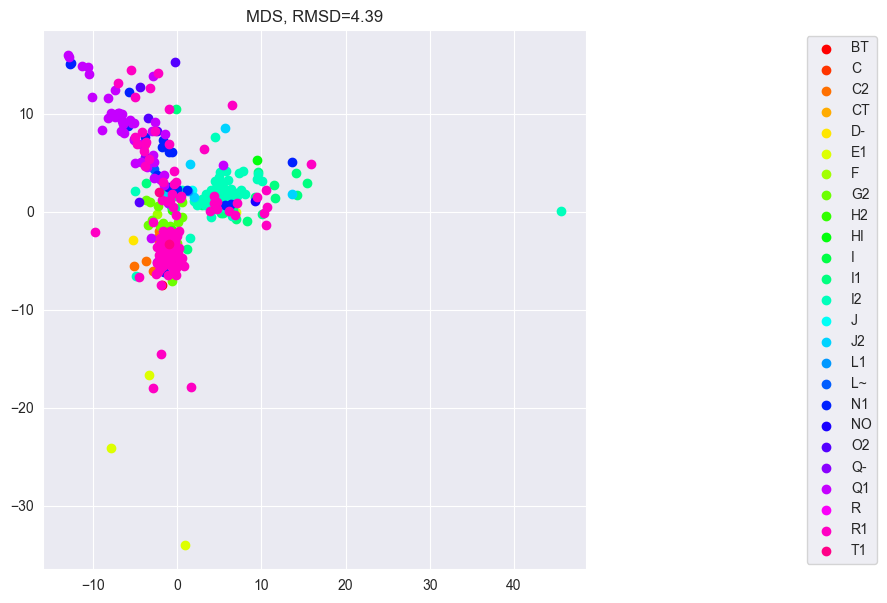

In [23]:
cmap = plt.get_cmap('hsv')
groups=np.unique(yhapl_c["small Y haplogroup"].astype(str))
colors = cmap(np.linspace(0, 1, len(groups)+2))

plt.figure(figsize=(7, 7))
for i, (group, color) in enumerate(zip(groups, colors), 1):
    plt.scatter(df_mds[yhapl_c["small Y haplogroup"]==group][:,0], df_mds[yhapl_c["small Y haplogroup"]==group][:,1], color=color)
plt.legend(groups,loc='center right',bbox_to_anchor=(1.55, 0.5))    
plt.title("MDS, RMSD={0}".format(np.round(rmse,2)), fontsize=12);

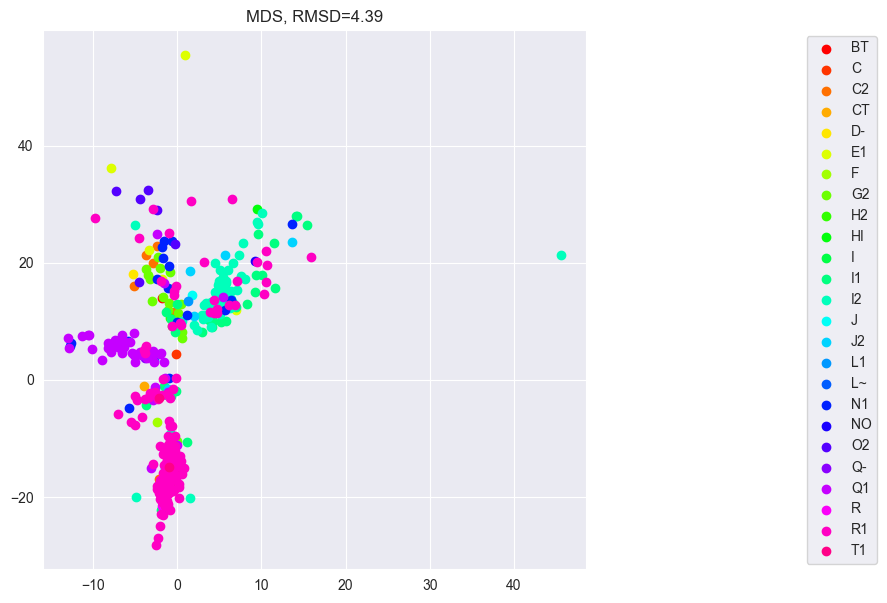

In [24]:
cmap = plt.get_cmap('hsv')
groups=np.unique(yhapl_c["small Y haplogroup"].astype(str))
colors = cmap(np.linspace(0, 1, len(groups)+2))

plt.figure(figsize=(7, 7))
for i, (group, color) in enumerate(zip(groups, colors), 1):
    plt.scatter(df_mds[yhapl_c["small Y haplogroup"]==group][:,0], df_mds[yhapl_c["small Y haplogroup"]==group][:,2], color=color)
plt.legend(groups,loc='center right',bbox_to_anchor=(1.55, 0.5))    
plt.title("MDS, RMSD={0}".format(np.round(rmse,2)), fontsize=12);

<u>Answer 4 : </u> 

Several haplogroups and regions of the worlds can easily be spotted on the projection.